### Template for NLP project

The aim of the project is to achieve the following:
 - Train a neural network that is **at least better than random guessing** on your dataset. The template contains the IMDB dataset for sentiment analysis, however, you can choose any other language related data set with the appropriate NLP task.
 - Investigate different neural network architectures (different hyperparameters, different layers, different pre-processing). Explain in the presentation, why the final network was selected! **Do not rely on black-box mechanisms.**
 

In [1]:
# tensorflow modules
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LayerNormalization, Input, GlobalAveragePooling1D, Dropout
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# if you have installed a different version, replace 'r2.6'  with your version in links provided below
print(tf.__version__)

2.8.0


In [2]:
# load imdb dataset
# links to dataset
# original dataset: https://ai.stanford.edu/~amaas/data/sentiment/
# version in tensorflow: https://www.tensorflow.org/versions/r2.6/api_docs/python/tf/keras/datasets/imdb

# select your vocabulary size
vocabularySize = 5000
# load data (it is already pre-processed)
# optional: add other pre.processing steps like stopword removal
(xTrain, yTrain), (xTest, yTest) = imdb.load_data(num_words=vocabularySize)
print('Loaded dataset with {} training samples, {} test samples'.format(len(xTrain), len(xTest)))

# look at the data
print('---review---')
print(xTrain[123])
print(xTrain[124])
print('---label---')
print(yTrain[123])

# look at the respective words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in xTrain[123]])


# other related dataset already in tensorflow:  reuters newswire classification dataset
# see https://www.tensorflow.org/versions/r2.6/api_docs/python/tf/keras/datasets/reuters

Loaded dataset with 25000 training samples, 25000 test samples
---review---
[1, 307, 5, 1301, 20, 1026, 2511, 87, 2775, 52, 116, 5, 31, 7, 4, 91, 1220, 102, 13, 28, 110, 11, 6, 137, 13, 115, 219, 141, 35, 221, 956, 54, 13, 16, 11, 2714, 61, 322, 423, 12, 38, 76, 59, 1803, 72, 8, 2, 23, 5, 967, 12, 38, 85, 62, 358, 99]
[1, 518, 12, 304, 6, 22, 231, 1300, 40, 2, 8, 721, 15, 1727, 117, 142, 15, 955, 2, 5, 2, 2, 15, 2, 6, 87, 20, 42, 6, 87, 229, 83, 6, 991, 31, 18, 4, 2088, 10, 10, 45, 24, 43, 15, 1660, 4669, 65, 47, 195, 3549, 5, 2, 231, 12, 878, 18, 60, 4, 91, 2, 7, 907, 8, 717, 2304, 60, 711, 309, 161, 2396, 38, 78, 45, 89, 2, 2, 4669, 2518, 89, 29, 2, 4, 1511, 83, 268, 58, 15, 2, 4, 3537, 199, 6, 1114, 2, 5, 6, 2, 2, 11, 940, 10, 10, 2, 717, 2, 136, 9, 17, 633, 1307, 4, 20, 4608, 19, 6, 2, 2455, 4764, 1062, 60, 151, 45, 1082, 702, 885, 2699, 1993, 5, 12, 2, 33, 57, 329, 74, 2, 234, 4, 370, 2, 143, 4, 2, 2, 7, 4, 4909, 1455, 40, 12, 9, 49, 243, 7, 2, 2, 2, 18, 4665, 2, 2, 665, 2, 4, 2, 

# Preprocessing

In [3]:
from nltk.corpus import stopwords

In [4]:
#load Stopwords
stopWords = set(stopwords.words('english'))
print(stopWords)

{'there', 'they', 'doing', 'itself', 'and', 'theirs', 'ours', 'between', 'where', 'nor', "you've", 'hadn', 'isn', 'under', 're', "hasn't", 'yourselves', 'them', 'no', 'didn', 'its', 'these', 'than', 'during', 'very', 'we', 'off', 'a', 'for', 'both', 'themselves', 'aren', "wasn't", 'or', 'does', "you're", 'how', "wouldn't", 'couldn', "you'd", "isn't", 'she', 'below', 'other', 'has', 'whom', 'you', 'wouldn', 'here', 'are', "couldn't", 'd', 'being', "shan't", 'can', 'wasn', 'ma', 'an', 'because', 'through', 'me', 'have', 'had', 'over', "haven't", 'were', 'just', 'o', 'myself', 'herself', 'which', 'doesn', 'did', 'himself', 'into', 'y', "won't", 'is', 'any', 'from', "aren't", 't', 'after', 'll', 've', "weren't", 'when', 'he', 'it', 'each', 'again', 'not', "needn't", "hadn't", 'more', 'the', 'only', 'but', "shouldn't", 'needn', 'ain', 'i', 'don', 'of', 'above', 'should', 'what', 'some', 'before', 'now', 'ourselves', 'as', 'to', 'same', 'haven', "don't", 'further', 'at', 'mustn', 'about', "d

In [5]:
stopWordNumbers = []

for word in stopWords:
    stopwordId = word2id.get(word, 0)
    stopWordNumbers.append(stopwordId)

print(stopWordNumbers)

[47, 33, 396, 407, 2, 9127, 11292, 197, 118, 882, 871, 0, 20781, 464, 793, 1478, 9888, 95, 54, 15496, 91, 131, 71, 312, 52, 72, 122, 3, 15, 196, 530, 0, 283, 39, 124, 332, 86, 583, 26232, 1387, 215, 56, 1905, 82, 44, 934, 22, 39964, 130, 23, 423, 1092, 109, 24086, 67, 29877, 8634, 32, 85, 140, 69, 25, 66, 117, 771, 68, 40, 1601, 543, 762, 60, 20830, 119, 306, 80, 5132, 525, 6, 98, 36, 710, 827, 100, 8725, 13340, 1170, 51, 26, 9, 254, 171, 21, 12421, 1866, 50, 1, 61, 18, 1613, 0, 0, 10, 1558, 4, 749, 141, 48, 46, 156, 147, 3144, 14, 5, 169, 19932, 89, 1034, 30, 0, 41, 149, 126, 34, 0, 11, 13, 43, 9540, 41026, 202, 27, 24, 177, 31, 35, 6444, 5460, 53, 145, 158, 1196, 42, 8, 134, 12, 52778, 487, 65, 87, 38, 439, 241, 138, 587, 168, 24007, 16, 45, 363, 260, 58, 92, 20, 257, 621, 77, 29, 0, 0, 426, 88, 41501, 277, 74, 96, 135, 1980, 6139, 78]


In [6]:
print(len(xTrain))
print(len(xTrain[0]))

25000
218


In [7]:

#for review in xTrain:
def removeStopWordsSpace(minValue, maxValue):
    removedWords = 0
    counter = minValue

    while counter <= maxValue:
        #print("StartLen:",len(xTrain[counter]))
        for word in xTrain[counter]:
            if word in stopWordNumbers:
                xTrain[counter].remove(word)
                removedWords+=1
        #print("EndLine:", len(xTrain[counter]))
        counter+=1
    return removedWords

def remvoeStopWords():
    print("Remove Words")
    startSpace = 0
    endSpace = 999
    while endSpace <= 25000:
        removedWords = removeStopWordsSpace(startSpace, endSpace)
        startSpace+=1000
        endSpace+=1000
        print("Step start:", startSpace, ", End:", endSpace, ", RemovedWords: ", removedWords)

remvoeStopWords()


#print("xTrain: len: ", len(xTrain[123], ", words:", xTrain[123])
        

Remove Words
Step start: 1000 , End: 1999 , RemovedWords:  88135
Step start: 2000 , End: 2999 , RemovedWords:  85981
Step start: 3000 , End: 3999 , RemovedWords:  89561
Step start: 4000 , End: 4999 , RemovedWords:  90407
Step start: 5000 , End: 5999 , RemovedWords:  85889
Step start: 6000 , End: 6999 , RemovedWords:  83455
Step start: 7000 , End: 7999 , RemovedWords:  84079
Step start: 8000 , End: 8999 , RemovedWords:  86079
Step start: 9000 , End: 9999 , RemovedWords:  82952
Step start: 10000 , End: 10999 , RemovedWords:  85457
Step start: 11000 , End: 11999 , RemovedWords:  83881
Step start: 12000 , End: 12999 , RemovedWords:  83455
Step start: 13000 , End: 13999 , RemovedWords:  85520
Step start: 14000 , End: 14999 , RemovedWords:  89032
Step start: 15000 , End: 15999 , RemovedWords:  88430
Step start: 16000 , End: 16999 , RemovedWords:  84654
Step start: 17000 , End: 17999 , RemovedWords:  85100
Step start: 18000 , End: 18999 , RemovedWords:  85459
Step start: 19000 , End: 19999 , 

In [8]:
imdb

<module 'keras.api._v2.keras.datasets.imdb' from 'C:\\Users\\felix\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\imdb\\__init__.py'>

In [9]:
# get properties of the dataset
print('Maximum train review length: {}'.format(len(max(xTrain, key=len))))
print('Maximum test review length: {}'.format(len(max(xTest, key=len))))
print('Minimum train review length: {}'.format(len(min(xTrain, key=len))))
print('Minimum test review length: {}'.format(len(min(xTest, key=len))))

Maximum train review length: 1566
Maximum test review length: 2315
Minimum train review length: 6
Minimum test review length: 7


In [10]:
# select maximum number of words as input lengt
# pad or truncated (this is done automatically) your data
maxWords = 1000
xTrain = sequence.pad_sequences(xTrain, maxlen=maxWords)
xTest = sequence.pad_sequences(xTest, maxlen=maxWords)

In [11]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [12]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [13]:
embeddingSize = 32
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
num_heads = 2  # Number of attention heads

model=Sequential()
model.add(Input(shape=(maxWords,)))
model.add(TokenAndPositionEmbedding(maxWords, vocabularySize, embeddingSize))
model.add(TransformerBlock(embeddingSize, num_heads, ff_dim))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.1))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# print model and check number of parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 token_and_position_embeddin  (None, 1000, 32)         192000    
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 1000, 32)         10656     
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                6

In [14]:
# set parameters for network training
batchSize = 64
numEpochs = 5

# train your model
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
xValid, yValid = xTrain[:batchSize], yTrain[:batchSize]
xTrain2, yTrain2 = xTrain[batchSize:], yTrain[batchSize:]
hist = model.fit(xTrain2, yTrain2, validation_data=(xValid, yValid), batch_size=batchSize, epochs=numEpochs)

# check result
scores = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', scores[1])

Epoch 1/5
390/390 [==============================] - 754s 2s/step - loss: 0.6079 - accuracy: 0.6208 - val_loss: 0.2558 - val_accuracy: 0.8906
Epoch 2/5
390/390 [==============================] - 743s 2s/step - loss: 0.2737 - accuracy: 0.8906 - val_loss: 0.2399 - val_accuracy: 0.8750
Epoch 3/5
390/390 [==============================] - 749s 2s/step - loss: 0.2225 - accuracy: 0.9155 - val_loss: 0.2239 - val_accuracy: 0.8906
Epoch 4/5
390/390 [==============================] - 774s 2s/step - loss: 0.2006 - accuracy: 0.9245 - val_loss: 0.3130 - val_accuracy: 0.8594
Epoch 5/5
390/390 [==============================] - 747s 2s/step - loss: 0.1871 - accuracy: 0.9298 - val_loss: 0.2730 - val_accuracy: 0.9062
Test accuracy: 0.8737999796867371


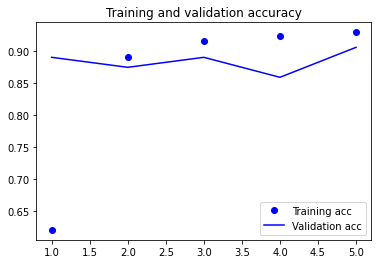

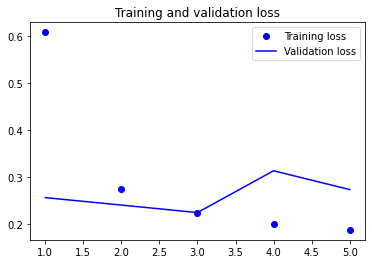

In [15]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()